## 4-4 线性回归代码实现

### 4.4.1 线性回归回顾

首先简单回顾一下，线性回归是一种机器学习算法，它用于预测连续的输出变量（也称为目标变量或响应变量），其中输出变量与输入变量之间具有线性关系。

在线性回归中，我们假设输出变量与输入变量之间具有如下线性关系：

$$ y = wx + b $$

其中，$y$ 是输出变量，$x$ 是输入变量，$w$ 和 $b$ 是参数，$w$ 称为权重或斜率，$b$ 称为偏差。

我们的目标是通过训练样本，找到最优的参数 $w$ 和 $b$，使得模型能够准确地预测新的样本。为了找到最优的参数，我们需要定义一个损失函数，表示模型的预测精度。在线性回归中，常用的损失函数是均方误差（mean squared error, MSE）：

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2} $$

其中，$y_{i}$ 是第 $i$ 个样本的真实输出值，$\hat{y}_{i}$ 是模型预测的输出值，$n$ 是样本数量。

可以使用梯度下降算法来最小化损失函数，即不断更新参数 $w$ 和 $b$，使得损失函数的值越来越小。

具体来说，我们需要计算损失函数对 $w$ 和 $b$ 的梯度，然后按照如下公式更新参数：

$$ w = w - \alpha \frac{\partial L}{\partial w} $$
$$ b = b - \alpha \frac{\partial L}{\partial b} $$

其中，$\alpha$ 是学习率，$L$ 是损失函数，$\frac{\partial L}{\partial w}$ 和 $\frac{\partial L}{\partial b}$ 分别表示损失函数对 $w$ 和 $b$ 的梯度。

我们可以重复进行这个过程，直到损失函数的值足够小，或者达到了设定的最大迭代次数为止。

### 4.4.2 代码实现

#### 数据生成

接下来进入代码部分，首先是数据生成，导入 numpy 和 pytorch 这两个库。然后，我们 numpy 的 random.seed 函数设置了随机数种子，使得每次运行代码生成的数据相同。

接着使用 numpy 的 random.rand 函数生成了一组随机的输入数据 x 和标签数据 y。其中，x 的每一列都是一个随机的样本，y 是每个样本的标签。

最后我们使用 pytorch 的 from_numpy 函数将数据转换为 tensor。

In [1]:
import numpy as np
import torch

# 设置随机数种子，使得每次运行代码生成的数据相同
np.random.seed(42)

# 生成随机数据
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

# 将数据转换为 pytorch tensor
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

需要注意的是，这里 tensor 是张量的意思，是一种多维数组。在机器学习领域，tensor 通常用来表示训练数据、模型参数、输入数据等。

Tensor 的维度可以是一维、二维、三维甚至更多维。Tensor 是机器学习框架（如 pytorch、tensorflow）中的基本数据结构。它具有良好的计算性能，可以使用 GPU 加速计算，大大提高计算效率。

#### 设置超参数

接下来，我们设置了两个超参数：学习率 $\alpha$ 和最大迭代次数。

In [2]:
# 设置超参数
learning_rate = 0.1
num_epochs = 1000

#### 初始化参数

然后，初始化了参数 $w$ 和 $b$。我们使用 pytorch 的 randn 函数来初始化参数 $w$ 和 zeros 函数来初始化参数 $b$。

randn 函数会生成一个均值为 0，标准差为 1 的随机张量，而 zeros 函数会生成一个全部元素都是 0 的张量。

还设置 requires_grad 参数为 True，这表示希望在反向传播时计算参数的梯度。

通常来说，初始化参数的值会对模型的训练结果产生较大的影响。一般来说，我们可以使用如下几种方法来初始化参数：

1. 使用常数值，如将所有参数初始化为 0。
2. 使用随机数，如使用 torch.randn 函数生成均值为 0，标准差为 1 的随机数。
3. 使用预训练的参数。

具体使用哪种方法，取决于具体的任务和数据。有时候，使用较好的初始化方法可以加速模型的训练，提高模型的准确率。

In [3]:
# 初始化参数
w = torch.randn(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

#### 开始训练

接下来开始训练，首先使用 for 循环迭代了最大迭代次数。在每一次迭代中，我们首先计算了预测值 $\hat{y}$，然后计算了损失函数 $L$。

接着我们使用 loss.backward() 来反向传播梯度。

然后在 with torch.no_grad() 块内借助框架自动计算的梯度手动更新了参数 $w$ 和 $b$。在更新参数之后，我们使用了 w.grad.zero_() 和 b.grad.zero_() 来清空梯度。

最后输出训练后的参数 $w$ 和 $b$。可以看到非常接近数据生成时的常数值。

In [4]:
# 开始训练
for epoch in range(num_epochs):
    # 计算预测值
    y_pred = x_tensor * w + b

    # 计算损失
    loss = ((y_pred - y_tensor) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # 清空梯度
        w.grad.zero_()
        b.grad.zero_()

# 输出训练后的参数
print('w:', w)
print('b:', b)

w: tensor([1.9540], requires_grad=True)
b: tensor([1.0215], requires_grad=True)


#### 可视化

可视化的部分，使用 matplotlib 的 plot 函数来绘制数据，同学们可以自行查阅相关资料。

分别绘制生成数据散点和拟合直线，可以看到效果还不错。

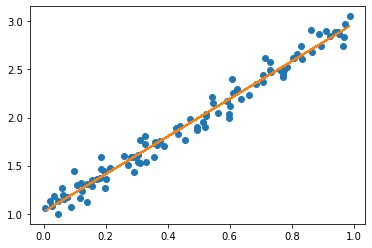

In [5]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.plot(x_tensor.numpy(), y_pred.detach().numpy())
plt.show()

### 4.4.3 完整代码

接着将所有代码组合起来，看一下完整代码示例，输出值和上面代码应该是一样的。同学们可以自行修改数据维度、学习率、迭代次数进行实验。

In [6]:
import numpy as np
import torch

# 设置随机数种子，使得每次运行代码生成的数据相同
np.random.seed(42)

# 生成随机数据
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

# 将数据转换为 pytorch tensor
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# 设置超参数
learning_rate = 0.1
num_epochs = 1000

# 初始化参数
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 开始训练
for epoch in range(num_epochs):
    # 计算预测值
    y_pred = x_tensor * w + b

    # 计算损失
    loss = ((y_pred - y_tensor) ** 2).mean()

    # 反向传播
    loss.backward()

    # 更新参数
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # 清空梯度
        w.grad.zero_()
        b.grad.zero_()

# 输出训练后的参数
print('w:', w)
print('b:', b)

w: tensor([1.9540], requires_grad=True)
b: tensor([1.0215], requires_grad=True)


### 4.4.4 Pytorch模型实现

最后看一下如何使用Pytorch模型实现，前面是手动定义和更新参数 $w$ 和 $b$。但每次都手动操作实在是太麻烦了，当然还有更简单的方法。先把前面没有变化的内容复制过来。然后定义输入数据的维度和输出数据的维度，接下来使用 nn.Linear 模块定义一个线性回归模型，它有 input_dim 个输入特征和 output_dim 个输出特征。本质上就是一个神经元，和前面 $w$ 、 $b$ 的作用是一样的。

然后使用 nn.MSELoss 模块定义一个均方误差（MSE）损失函数，使用 torch.optim.SGD 模块定义一个随机梯度下降（SGD）优化器，并传入前面定义好的学习率。

In [7]:
import numpy as np
import torch
import torch.nn as nn

# 设置随机数种子，使得每次运行代码生成的数据相同
np.random.seed(42)

# 生成随机数据
x = np.random.rand(100, 1)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

# 将数据转换为 pytorch tensor
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# 设置超参数
learning_rate = 0.1
num_epochs = 1000

# 定义输入数据的维度和输出数据的维度
input_dim = 1
output_dim = 1

# 定义模型
model = nn.Linear(input_dim, output_dim)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 开始训练
for epoch in range(num_epochs):
    # 将输入数据喂给模型
    y_pred = model(x_tensor)

    # 计算损失
    loss = criterion(y_pred, y_tensor)
    
    # 清空梯度
    optimizer.zero_grad()

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

# 输出训练后的参数
print('w:', model.weight.data)
print('b:', model.bias.data)

w: tensor([[1.9540]])
b: tensor([1.0215])


还是使用 for 循环迭代最大迭代次数。在每一次迭代中，我们首先用模型计算输入数据的预测值 y_pred ，然后使用损失函数计算 𝐿oss ，也就是MSE均方误差。

接着我们使用优化器的 zero_grad 方法清空梯度，然后调用 loss.backward 来反向传播梯度。

再直接调用优化器的 step 方法就可以更新模型的参数。

最后还是输出训练后的参数 $ 𝑤 $ 和 $ 𝑏 $。可以看到和前面手动更新的输出值是完全一致的。通过这种模式可以进一步定义复杂网络，然后很容易的批量更新参数。

好了，这一节我们简单回顾了线性回归的要点，用代码一步步实现了线性回归并进行详细解释，最后使用Pytorch框架快速实现。大家加油。

[Next 4-5多分类问题代码实现](./4-5%20多分类问题代码实现.ipynb)